In [70]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("MIX_MF_midle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [71]:
data

['t_n61          2.0120 ( 1.6576,  2.5941) ( 1.6265,  2.5019)  0.8755 (Jnode 118)\n',
 't_n62          1.6796 ( 1.2249,  2.2392) ( 1.1969,  2.1976)  1.0007 (Jnode 117)\n',
 't_n63          1.5223 ( 1.1043,  2.0550) ( 1.0711,  2.0093)  0.9381 (Jnode 116)\n',
 't_n64          1.4852 ( 1.0778,  2.0106) ( 1.0408,  1.9626)  0.9218 (Jnode 115)\n',
 't_n65          1.3937 ( 1.0108,  1.9035) ( 0.9715,  1.8433)  0.8718 (Jnode 114)\n',
 't_n66          0.5942 ( 0.4048,  0.9944) ( 0.3769,  0.9316)  0.5547 (Jnode 113)\n',
 't_n67          0.5271 ( 0.3565,  0.8978) ( 0.3236,  0.8303)  0.5067 (Jnode 112)\n',
 't_n68          0.4743 ( 0.3186,  0.8138) ( 0.2875,  0.7533)  0.4658 (Jnode 111)\n',
 't_n69          0.4229 ( 0.2696,  0.7303) ( 0.2463,  0.6788)  0.4325 (Jnode 110)\n',
 't_n70          0.2633 ( 0.1238,  0.4634) ( 0.1060,  0.4335)  0.3275 (Jnode 109)\n',
 't_n71          0.1618 ( 0.0582,  0.3254) ( 0.0458,  0.2976)  0.2518 (Jnode 108)\n',
 't_n72          0.0612 ( 0.0040,  0.1959) ( 0.0000,  

In [72]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [73]:
model1_mean_times = {}
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    model1_mean_times[int(line[0][3:])] = float(line[1])
    model1_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [74]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',


In [75]:
posterior_mean_iqtree

[2.012,
 1.6796,
 1.5223,
 1.4852,
 1.3937,
 0.5942,
 0.5271,
 0.4743,
 0.4229,
 0.2633,
 0.1618,
 0.0612,
 0.3097,
 0.1116,
 0.0796,
 0.0571,
 0.032,
 0.1945,
 0.0599,
 0.284,
 0.1349,
 1.0152,
 0.6301,
 0.4522,
 0.3641,
 0.1837,
 0.493,
 0.4671,
 0.2817,
 0.1418,
 0.1041,
 0.0509,
 0.227,
 0.1679,
 0.2999,
 0.5225,
 0.2771,
 0.2407,
 0.1327,
 0.0071,
 0.2096,
 0.1596,
 0.0485,
 0.232,
 0.1524,
 0.1812,
 0.0515,
 0.0096,
 0.0024,
 1.4651,
 1.4206,
 0.4205,
 0.2962,
 0.2335,
 0.109,
 0.448,
 0.2427,
 0.2638,
 0.071,
 2.012,
 1.6796,
 1.5223,
 1.4852,
 1.3937,
 0.5942,
 0.5271,
 0.4743,
 0.4229,
 0.2633,
 0.1618,
 0.0612,
 0.3097,
 0.1116,
 0.0796,
 0.0571,
 0.032,
 0.1945,
 0.0599,
 0.284,
 0.1349,
 1.0152,
 0.6301,
 0.4522,
 0.3641,
 0.1837,
 0.493,
 0.4671,
 0.2817,
 0.1418,
 0.1041,
 0.0509,
 0.227,
 0.1679,
 0.2999,
 0.5225,
 0.2771,
 0.2407,
 0.1327,
 0.0071,
 0.2096,
 0.1596,
 0.0485,
 0.232,
 0.1524,
 0.1812,
 0.0515,
 0.0096,
 0.0024,
 1.4651,
 1.4206,
 0.4205,
 0.2962,
 0.2335

In [76]:
lower_ci_iqtree

[]

In [77]:
upper_ci_iqtree

[]

In [78]:
file_LG = open("GTR_G4_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

model2_mean_times = {}     
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    model2_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [80]:
posterior_mean_baseml

[2.4912,
 0.7752,
 0.7462,
 0.7228,
 0.5226,
 0.2888,
 0.2448,
 0.1606,
 0.0162,
 0.1997,
 0.148,
 0.0409,
 0.2501,
 0.1723,
 0.2013,
 0.0604,
 0.0189,
 0.0048,
 0.6702,
 0.5297,
 0.3845,
 0.2939,
 0.1494,
 0.2426,
 0.3163,
 0.2963,
 0.1963,
 0.1143,
 0.0861,
 0.0361,
 0.1667,
 0.1253,
 0.1843,
 0.2842,
 0.2285,
 0.1787,
 0.1191,
 0.0471,
 0.0349,
 0.0261,
 0.0167,
 0.0844,
 0.0288,
 0.1664,
 0.1157,
 0.0781,
 0.0215,
 0.1801,
 0.1147,
 0.6242,
 0.5776,
 0.2303,
 0.055,
 0.0436,
 0.0138,
 0.1257,
 0.0963,
 2.0416,
 1.0502]

In [81]:
posterior_mean_iqtree

[2.012,
 1.6796,
 1.5223,
 1.4852,
 1.3937,
 0.5942,
 0.5271,
 0.4743,
 0.4229,
 0.2633,
 0.1618,
 0.0612,
 0.3097,
 0.1116,
 0.0796,
 0.0571,
 0.032,
 0.1945,
 0.0599,
 0.284,
 0.1349,
 1.0152,
 0.6301,
 0.4522,
 0.3641,
 0.1837,
 0.493,
 0.4671,
 0.2817,
 0.1418,
 0.1041,
 0.0509,
 0.227,
 0.1679,
 0.2999,
 0.5225,
 0.2771,
 0.2407,
 0.1327,
 0.0071,
 0.2096,
 0.1596,
 0.0485,
 0.232,
 0.1524,
 0.1812,
 0.0515,
 0.0096,
 0.0024,
 1.4651,
 1.4206,
 0.4205,
 0.2962,
 0.2335,
 0.109,
 0.448,
 0.2427,
 0.2638,
 0.071,
 2.012,
 1.6796,
 1.5223,
 1.4852,
 1.3937,
 0.5942,
 0.5271,
 0.4743,
 0.4229,
 0.2633,
 0.1618,
 0.0612,
 0.3097,
 0.1116,
 0.0796,
 0.0571,
 0.032,
 0.1945,
 0.0599,
 0.284,
 0.1349,
 1.0152,
 0.6301,
 0.4522,
 0.3641,
 0.1837,
 0.493,
 0.4671,
 0.2817,
 0.1418,
 0.1041,
 0.0509,
 0.227,
 0.1679,
 0.2999,
 0.5225,
 0.2771,
 0.2407,
 0.1327,
 0.0071,
 0.2096,
 0.1596,
 0.0485,
 0.232,
 0.1524,
 0.1812,
 0.0515,
 0.0096,
 0.0024,
 1.4651,
 1.4206,
 0.4205,
 0.2962,
 0.2335

In [82]:
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([-0.1,3], 
#         [-0.1, 3], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age Partition MIX+MF [-Q] [100 Mya]', fontsize=18)
# # ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./afrotheria_posterior_mean_age_comparison_partition_MIX_MF_p_middle_scatter.png')

In [83]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')

In [84]:
import copy
from ete3 import Tree

iqtree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4.tree"
mcmctree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60.tree"

tree_iqtree = Tree(iqtree_file)

iqtree_node_traversal = []
for node in tree_iqtree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    iqtree_node_traversal.append(node.name)

tree_mcmctree = Tree(mcmctree_file)

mcmctree_node_traversal = []
for node in tree_mcmctree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    mcmctree_node_traversal.append(node.name)

In [85]:
iqtree_node_traversal

['Volvox:Aeropyrum_pernix:Oryza_sativa:Methanothermobacter_thermautotro:Oscillochloris:Chlamydia_trachomatis:Paramecium:Nanosalina:Ar5:Cyanidioschyzon:Loki2:DUSEL3:Haloarcula_marismortui:Sulfolobus_solfataricus:Rhodopirellula_baltica:Caldivirga_maquilingensis:Chlamydomonas:Saccharomyces_cerevisiae:Pyrobaculum_aerophilum:Bodo:Micrarchaeum_acidiphilum:Rhodopseudomonas_palustris:Thalassiosira_pseudonana:Trichomonas_vaginalis:Agaricus:Ignicoccus_hospitalis:Actinomadura:Caldithrix:Korarchaeum_cryptofilum:Fibrobacter:Gloeobacter:Latescibacteria:Phytophthora_ramorum:Synechocystis_sp._PCC6803:Hydra:Galdieria:Leishmania_major:Elphidium:Thermoplasma_volcanium:Thermodesulfatator:Thermofilum_pendens:Reticulomyxa:Hyperthermus_butylicus:Candidatus:Archaeoglobus_fulgidus:Dictyoglomus:Arabidopsis_thaliana:Amphimedon:Limulus:Cenarchaeum_symbiosum:Chthonomonas:Homo_sapiens:Lokiarchaeum:Polysphondylium:Methanosarcina_mazei:Nanosalinarum:Aquifex:Batrachochytrium:Tetrahymena:Chlorobium:Jonquetella:Caldiarc

In [86]:
mcmctree_node_traversal

['Volvox:Aquifex:Chlamydomonas:Chlamydia_trachomatis:Cylindrosperopsis:Kosmotoga:Physcomitrella:Methanococcus_jannaschii:Ar15:Latescibacteria:Gloeobacter:Nanosalinarum:Caldithrix:Arabidopsis_thaliana:Gemmatimonas:Microgenomates:Clostridium_acetobutylicum:Nanosalina:Acidobacterium:Leishmania_major:Parvarchaeum_acidophilus:Pyrococcus_furiosus:Synechocystis_sp._PCC6803:Chlorogloeopsis:Ar13:Thalassiosira_pseudonana:Campylobacter_jejuni:Galdieria:DUSEL3:Fibrobacter:Nanoarchaeum:Ar5:Oryza_sativa:Ar6:Cyanidioschyzon:Micrarchaeum_acidiphilum:DUSEL4:Jonquetella:Homo_sapiens:Thermodesulfatator:Pyrobaculum_aerophilum:Loki3:Giardia_lamblia:Candidatus:Hyperthermus_butylicus:Verrucomicrobium:Staphylothermus_marinus:Oscillochloris:Hydra:Dictyoglomus:Caldisericum:Amphimedon:Rhodopseudomonas_palustris:Thermofilum_pendens:Rhodopirellula_baltica:Desulfurispirillum:Chondrus:Dictyostelium_discoideum:Escherichia_coli:Agaricus:Cyanophora:Treponema_pallidum:Loki2:Lokiarchaeum:Rickettsia:Archaeoglobus_fulgidus

In [87]:
LG_G4_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/Afrotheria/complex-model-analysis-v1/GTR_G4_index.tree"
LG_G4_C60_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/Afrotheria/complex-model-analysis-v1/MIX_MF_index.tree"
# Load the tree using ETE3
tree1 = Tree(LG_G4_index_tree)
tree2 = Tree(LG_G4_C60_index_tree)


# Function to traverse the tree and populate the dictionary
def traverse_and_collect(node, clade_values):
    if not node.is_leaf():
        clade_name = node.name if node.name else "root"
        # Retrieve the support value (if exists)
        if clade_name == "root":
            clade_name = "root:1"
        support_value = node.support if node.support else None
        clade_values[clade_name] = support_value
        for child in node.get_children():
            # print(child)
            # print(child.get_leaf_names())
            child_names = child.get_leaf_names()
            cleaned_child_names = ["_".join(name.split('_')[1:]) for name in child_names]
            cleaned_child_names.sort()
            final_child_name = ":".join(cleaned_child_names)+":"+str(len(cleaned_child_names))
            support_value = node.support if node.support else None
            # print(support_value)
            clade_values[final_child_name] = support_value
            traverse_and_collect(child, clade_values)

In [88]:
# Start the traversal from the root
clade_values_tree1 = {}

traverse_and_collect(tree1, clade_values_tree1)

# Display the clade names with their associated values
for clade, value in clade_values_tree1.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 119.0
Clade: amblysomus_corriae:amblysomus_hottentotus:amblysomus_marleyi:amblysomus_robustus:amblysomus_septentrionalis:calcochloris_obtusirostris:carpitalpa_arendsi:chlorotalpa_duthieae:chlorotalpa_sclateri:chrysochloris_asiatica:chrysochloris_stuhlmanni:chrysospalax_trevelyani:chrysospalax_villosus:cryptochloris_wintoni:dendrohyrax_dorsalis:dugong_dugon:echinops_telfairi:elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:elephas_maximus:elephas_maximus_indicus:eremitalpa_granti:geogale_aurita:hemicentetes_semispinosus:heterohyrax_brucei:limnogale_mergulus:loxodonta_africana:loxodonta_cyclotis:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:microgale_brevicaudata:microgale_longicaudata:microgale_majori:microgale_principula:microgale_pusilla:microgale_talazaci:micropotamogale_lamottei:neamblysomus_gunningi:neamblysomus_juli

In [89]:
# Start the traversal from the root
clade_values_tree2 = {}

traverse_and_collect(tree2, clade_values_tree2)

# Display the clade names with their associated values
for clade, value in clade_values_tree2.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 119.0
Clade: amblysomus_corriae:amblysomus_hottentotus:amblysomus_marleyi:amblysomus_robustus:amblysomus_septentrionalis:calcochloris_obtusirostris:carpitalpa_arendsi:chlorotalpa_duthieae:chlorotalpa_sclateri:chrysochloris_asiatica:chrysochloris_stuhlmanni:chrysospalax_trevelyani:chrysospalax_villosus:cryptochloris_wintoni:dendrohyrax_dorsalis:dugong_dugon:echinops_telfairi:elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:elephas_maximus:elephas_maximus_indicus:eremitalpa_granti:geogale_aurita:hemicentetes_semispinosus:heterohyrax_brucei:limnogale_mergulus:loxodonta_africana:loxodonta_cyclotis:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:microgale_brevicaudata:microgale_longicaudata:microgale_majori:microgale_principula:microgale_pusilla:microgale_talazaci:micropotamogale_lamottei:neamblysomus_gunningi:neamblysomus_juli

In [90]:
diff_indexes = []
for clade, value in clade_values_tree1.items():
    names = clade.split(":")
    len_of_clade = int(names[-1])
    for clade2, value2 in clade_values_tree2.items():
        names2 = clade2.split(":")
        len_of_clade2 = int(names2[-1])
        if clade == clade2 and value != value2:
           print(f"Clade: {clade}, Support Value LG_G4: {value}, Support Value LG_G4_C60: {value2}")
           diff_indexes.append([int(value), int(value2)])

Clade: elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:petrodromus_tetradactylus:petrosaltator_rozeti:12, Support Value LG_G4: 65.0, Support Value LG_G4_C60: 96.0
Clade: elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:7, Support Value LG_G4: 66.0, Support Value LG_G4_C60: 97.0
Clade: elephantulus_edwardii:elephantulus_myurus:elephantulus_sp_vb001:3, Support Value LG_G4: 67.0, Support Value LG_G4_C60: 98.0
Clade: elephantulus_edwardii:1, Support Value LG_G4: 68.0, Support Value LG_G4_C60: 99.0
Clade: elephantulus_myurus:elephantulus_sp_vb001:2, Support Value LG_G4: 68.0, Support Value LG_G4_C60: 99.0
Clade: elephantulus_sp_vb001:1, Support Value LG_G4: 69.0, Support Value LG_G4_C60: 100.0
Clade: e

In [91]:
diff_indexes

[[65, 96],
 [66, 97],
 [67, 98],
 [68, 99],
 [68, 99],
 [69, 100],
 [69, 100],
 [67, 98],
 [70, 101],
 [71, 102],
 [71, 102],
 [70, 101],
 [72, 103],
 [72, 103],
 [66, 97],
 [73, 104],
 [74, 105],
 [74, 105],
 [73, 104],
 [75, 106],
 [76, 107],
 [76, 107],
 [75, 106],
 [65, 96],
 [77, 108],
 [77, 108],
 [78, 109],
 [78, 109],
 [79, 65],
 [80, 82],
 [81, 83],
 [82, 84],
 [83, 86],
 [83, 86],
 [82, 84],
 [84, 85],
 [84, 85],
 [81, 83],
 [85, 87],
 [86, 88],
 [87, 89],
 [88, 90],
 [89, 91],
 [90, 92],
 [90, 92],
 [89, 91],
 [88, 90],
 [87, 89],
 [91, 93],
 [92, 94],
 [92, 94],
 [91, 93],
 [86, 88],
 [85, 87],
 [80, 82],
 [93, 95],
 [93, 95],
 [79, 65],
 [94, 66],
 [95, 67],
 [96, 68],
 [97, 73],
 [98, 74],
 [99, 75],
 [100, 76],
 [101, 77],
 [101, 77],
 [100, 76],
 [99, 75],
 [98, 74],
 [97, 73],
 [102, 78],
 [103, 79],
 [103, 79],
 [102, 78],
 [96, 68],
 [104, 69],
 [105, 70],
 [106, 71],
 [106, 71],
 [105, 70],
 [104, 69],
 [107, 72],
 [107, 72],
 [95, 67],
 [94, 66],
 [108, 80],
 [109,

In [92]:
unique_data = [list(t) for t in set(tuple(inner) for inner in diff_indexes)]

# Print the result
print(unique_data)

[[82, 84], [66, 97], [75, 106], [76, 107], [87, 89], [105, 70], [71, 102], [72, 103], [92, 94], [99, 75], [67, 98], [77, 108], [93, 95], [88, 90], [106, 71], [68, 99], [94, 66], [100, 76], [80, 82], [89, 91], [107, 72], [73, 104], [79, 65], [108, 80], [85, 87], [101, 77], [95, 67], [69, 100], [78, 109], [65, 96], [74, 105], [81, 83], [90, 92], [97, 73], [84, 85], [109, 81], [86, 88], [102, 78], [96, 68], [91, 93], [98, 74], [70, 101], [83, 86], [104, 69], [103, 79]]


In [93]:
model2_keys = [i[0] for i in unique_data]
model1_keys = [i[1] for i in unique_data]

In [94]:
mapped_keys = {}
for i in range(len(model2_keys)):
    mapped_keys[model2_keys[i]] = model1_keys[i]

In [95]:
model1_revised_times = {}
for key, value in model1_mean_times.items():
    if key in model1_keys:
        model1_revised_times[key] = model1_mean_times[mapped_keys[key]]
    else:
        model1_revised_times[key] = value

In [96]:
model1_mean_posterior_times = np.array(list(model1_revised_times.values()))
model2_mean_posterior_times = np.array(list(model2_mean_times.values()))

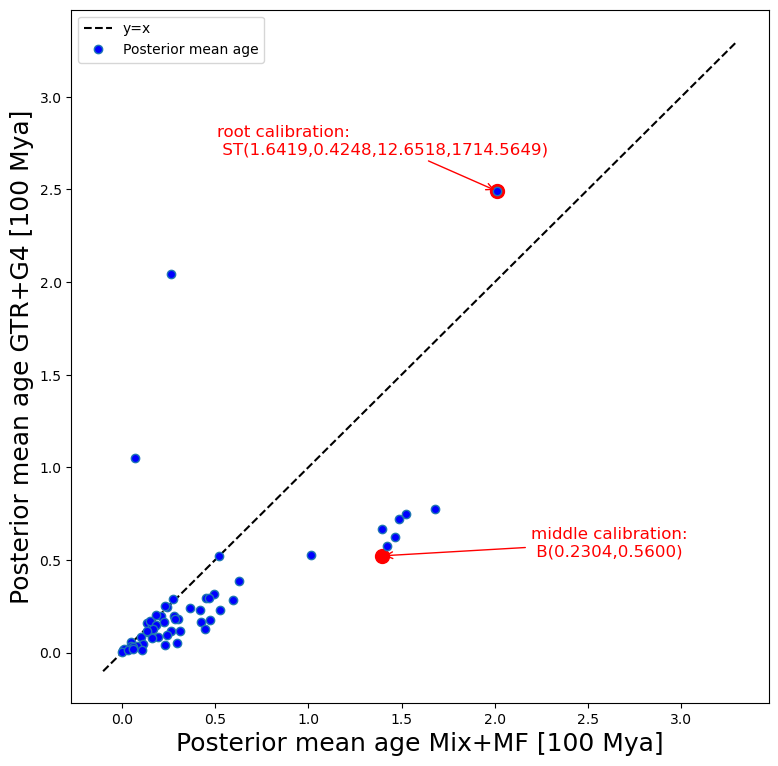

In [98]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,3.3], 
        [-0.1, 3.3], 
        'k--', label='y=x')
points = ax.plot(model1_mean_posterior_times, model2_mean_posterior_times, 'o', label='Posterior mean age')
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[4], posterior_mean_baseml[4], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n ST(1.6419,0.4248,12.6518,1714.5649)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0]-1.5,  posterior_mean_baseml[0]+0.2 ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('middle calibration:\n B(0.2304,0.5600)', 
        xy=(posterior_mean_iqtree[4], posterior_mean_baseml[4]), 
        xytext=(posterior_mean_iqtree[4]+0.8 ,  posterior_mean_baseml[4] ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age Mix+MF [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

plt.savefig('./afrotheria_mix_mf_middle_scatter.png')